In [1]:
import pcrglobwb_utils
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
import spotpy as sp
import os, sys
import datetime

In [2]:
print('this notebook was created using Python', str((sys.version)), 'on a', str(sys.platform),'on', datetime.datetime.now())

this notebook was created using Python 3.8.2 | packaged by conda-forge | (default, Mar  5 2020, 17:29:01) [MSC v.1916 64 bit (AMD64)] on a win32 on 2020-10-05 14:26:03.231738


In [3]:
print('using pcrglobwb_utils version', pcrglobwb_utils.__version__)

using pcrglobwb_utils version 0.1.4.5b


In [4]:
TZA_waterProvinces = pcrglobwb_utils.spatial_validation.validate_per_shape(shp_fo='example_data/Tanzania_shp/waterProvinces.shp',
                                                                           shp_key='watprovID')

reading shp-file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\Tanzania_shp\waterProvinces.shp


In [5]:
TZA_waterProvinces.extent_gdf.head()

,OBJECTID,MAJORBASIN,COUNTRY,REGION,watprov,watprovID,km2,Shape_Leng,Shape_Area,geometry
0,12,"Africa, East Central Coast",Tanzania,Iringa,"Tanzania_Iringa_Africa, East Central Coast",25,88460.9,22.002607,7.195788,"POLYGON ((36.29721 -5.12083, 36.29583 -5.12503..."
1,13,"Africa, East Central Coast",Tanzania,Lindi,"Tanzania_Lindi_Africa, East Central Coast",28,85004.1,15.485085,6.865913,"MULTIPOLYGON (((40.19511 -10.26096, 40.19125 -..."
2,14,"Africa, East Central Coast",Tanzania,Manyara,"Tanzania_Manyara_Africa, East Central Coast",29,36772.8,13.405812,2.976842,"POLYGON ((37.17537 -2.76838, 37.17193 -2.76958..."
3,15,"Africa, East Central Coast",Tanzania,Mbeya,"Tanzania_Mbeya_Africa, East Central Coast",30,17342.4,8.245606,1.414085,"POLYGON ((34.15102 -7.38556, 34.15304 -7.39140..."
4,16,"Africa, East Central Coast",Tanzania,Morogoro,"Tanzania_Morogoro_Africa, East Central Coast",31,146718.0,29.906623,11.605295,"MULTIPOLYGON (((39.25203 -8.00781, 39.24966 -8..."


In [6]:
watprov_gdf = TZA_waterProvinces.against_GRACE(PCR_nc_fo='example_data/GRACE/totalWaterStorageThickness_monthAvg_output_2010_Tanzania.nc',
                                               GRACE_nc_fo='example_data/GRACE/GRACE_data_2010_Tanzania.nc')

reading GRACE file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\GRACE\GRACE_data_2010_Tanzania.nc
reading PCR-GLOBWB file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\GRACE\totalWaterStorageThickness_monthAvg_output_2010_Tanzania.nc
extract raw data from nc-files
clipping nc-files to extent of shp-file
computing R and RMSE for polygon with key identifier watprovID 25
computing R and RMSE for polygon with key identifier watprovID 28
computing R and RMSE for polygon with key identifier watprovID 29
computing R and RMSE for polygon with key identifier watprovID 30
computing R and RMSE for polygon with key identifier watprovID 31
computing R and RMSE for polygon with key identifier watprovID 32
computing R and RMSE for polygon with key identifier watprovID 33
computing R and RMSE for polygon with key identifier watprovID 443
computing R and RMSE for polygon with key identifier watprovID 444
computing R and RMSE for polygon with key iden

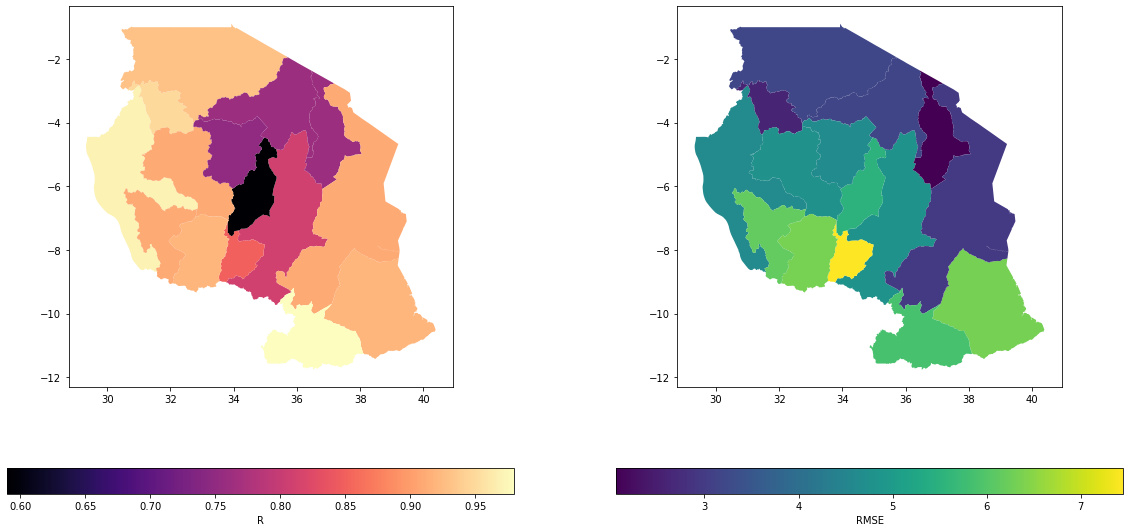

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
watprov_gdf.plot(column='R', ax=ax1, cmap='magma', legend=True, legend_kwds={'orientation':'horizontal', 'label':'R'})
watprov_gdf.plot(column='RMSE', ax=ax2, cmap='viridis', legend=True, legend_kwds={'orientation':'horizontal', 'label':'RMSE'});

In [8]:
watprov_gdf = TZA_waterProvinces.against_GLEAM(PCR_nc_fo='example_data/GLEAM/totalEvaporation_monthTot_output_2010_Tanzania.nc',
                                               GLEAM_nc_fo='example_data/GLEAM/GLEAM_data_2010_Tanzania.nc')

reading GLEAM file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\GLEAM\GLEAM_data_2010_Tanzania.nc
reading PCR-GLOBWB file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\GLEAM\totalEvaporation_monthTot_output_2010_Tanzania.nc
extract raw data from nc-files
clipping nc-files to extent of shp-file
computing R and RMSE for polygon with key identifier watprovID 25
computing R and RMSE for polygon with key identifier watprovID 28
computing R and RMSE for polygon with key identifier watprovID 29
computing R and RMSE for polygon with key identifier watprovID 30
computing R and RMSE for polygon with key identifier watprovID 31
computing R and RMSE for polygon with key identifier watprovID 32
computing R and RMSE for polygon with key identifier watprovID 33
computing R and RMSE for polygon with key identifier watprovID 443
computing R and RMSE for polygon with key identifier watprovID 444
computing R and RMSE for polygon with key identifier wat

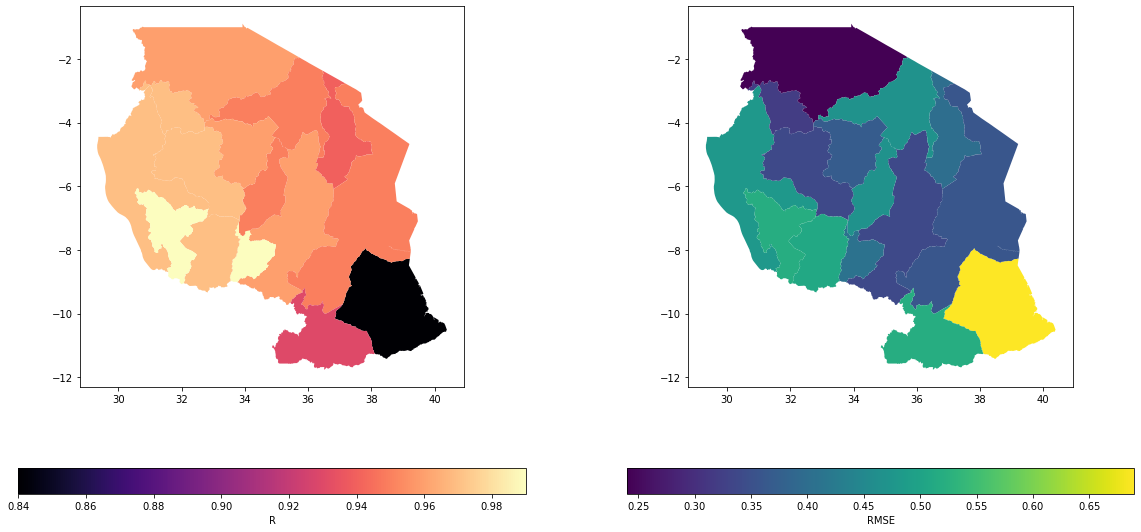

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
watprov_gdf.plot(column='R', ax=ax1, cmap='magma', legend=True, legend_kwds={'orientation':'horizontal', 'label':'R'})
watprov_gdf.plot(column='RMSE', ax=ax2, cmap='viridis', legend=True, legend_kwds={'orientation':'horizontal', 'label':'RMSE'});